# Social Networks and Text Analysis - Network’s Partitions, Community detection

In [1]:
## Only run this if you are using Google Colab and need to install new packages 
# before you can use them
!pip install python-igraph

     |████████████████████████████████| 3.2MB 8.0MB/s 


In [1]:
## Now import the librares required for this lab
import networkx as nx #---> Library for network analysis
import matplotlib.pyplot as plt #---> Library for creating plots
import matplotlib.colors as mcolors #---> Library for adding colours to plots
import collections #---> Library for operating with dictionaries
import random #---> Library for generating random numbers/distributions
import community #---> Library for performing community detection
import numpy as np #---> Library for efficiently operating with arrays/matrices/vectors
import igraph #---> Additional library for network analysis
import matplotlib
%matplotlib inline

# Definition of function to plot communities

In [2]:
def draw_clu(G, pos, measures, measure_name):
  
    # Create an array to contain the clusters which have been found
    clusters=np.array(list(set(measures.values())))

    # Create a figure to draw the plots and charts
    plt.figure()

    # Create the plot of the network to be placed in the figure
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=mcolors.ListedColormap(plt.cm.Set3(clusters)), 
                                   node_color=list(measures.values()),
                                   nodelist=list(measures.keys()))


    # Add labels to the plot
    labels = nx.draw_networkx_labels(G, pos)

    # Add edges to the plot
    edges = nx.draw_networkx_edges(G, pos)

    # Create the title of the plot
    plt.title(measure_name)

    # Add a colour bar to act as a legend
    cb = plt.colorbar(nodes,ticks=range(0,len(clusters)), label='Communities')
    cb.ax.tick_params(length=0)
    # Adds the community labels to the colour bar
    cb.set_ticklabels(list(set(measures.values())))


    nodes.set_clim(-0.5, len(clusters)-0.5)

    # Show the plot without the x/y axis
    plt.axis('off')
    plt.show()

In [3]:
# Get the karate club network datast from the networkx library
G = nx.karate_club_graph()

# Set the positions of the nodes according to a spring layout
pos = nx.spring_layout(G)

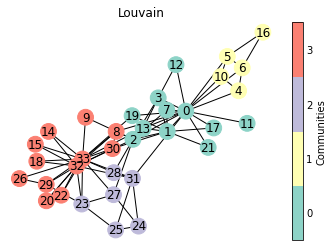

In [4]:
# Run the function and draw the network
draw_clu(G, pos, community.best_partition(G),'Louvain' )

# Networkx into Igraph trasformation

In [5]:
Gnx = nx.path_graph(4) # Create a random NX graph
nx.write_graphml(G,'graph.graphml') # Export NX graph to file

import igraph as ig
Gix = ig.read('graph.graphml',format="graphml") # Create new IG graph from the same file

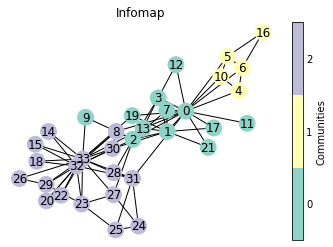

In [6]:
# Use igraph to detect communities with the infomap algorithm
communi_G=Gix.community_infomap()

# Crate a dictionary of each node's community membership for the graph
com_dict={k: communi_G.membership[k] for k in range(communi_G.n)}

# Plot the graph using the same function
draw_clu(G, pos, com_dict, 'Infomap')

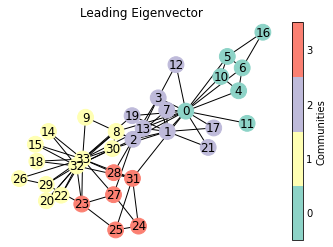

In [7]:
# Use igraph to detect communities with the infomap algorithm
communi_G=Gix.community_leading_eigenvector()

# Crate a dictionary of each node's community membership for the graph
com_dict={k: communi_G.membership[k] for k in range(communi_G.n)}

# Plot the graph using the same function
draw_clu(G, pos,com_dict,'Leading Eigenvector' )

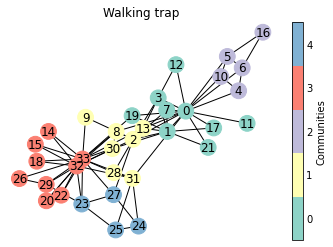

In [8]:
# Use igraph to detect communities with the walking trap algorithm
commun=Gix.community_walktrap()
communi_G=commun.as_clustering()

# Crate a dictionary of each node's community membership for the graph
com_dict={k: communi_G.membership[k] for k in range(len(communi_G.membership))}

# Plot the graph using the same function
draw_clu(G, pos,com_dict,'Walking trap' )

# Example of clustering for similarity networks

In [9]:
from collections import Counter, defaultdict #---> Library for operating with dictionaries
import operator #---> Library for doing maths
import seaborn as sns #---> Library for drawing plots
from matplotlib import pyplot, patches #---> Library for drawing plots

In [10]:
# Creation of the random sample of users

nuser=100
max_codes=20
codes= [str(x) for x in range(max_codes+ 1)]

user_codes=[]

# For each user, create a random code between 1 and the max
for k in range(nuser):
    user_n_codes=random.randint(1,max_codes)
    user_codes.append(random.sample(codes,user_n_codes))

In [11]:

#similarity network generation usign the jaccard relation https://en.wikipedia.org/wiki/Jaccard_index

# Create a graph
G_per=nx.Graph()

# Set a similarity threshold, above which an edge will exist between two nodes
threshold=0.2

# Initialise empty lists to fill with values
list_Vex_per=[]
list_pesi_per=[]
#list_jaccard_per=[]

# For each user, look at the number os shared codes with other users and add
# edges based on similarity score/threshold value
for k in range(nuser):
    for k2 in range(k+1,nuser):
        Num=len(set(user_codes[k]).intersection(user_codes[k2]))
        Dem=len(set(user_codes[k]+user_codes[k2]))
        similarity=float(abs(Num))/float(Dem)
        if similarity>threshold:
            G_per.add_edge(k,k2,weight=similarity)
            list_Vex_per.append([(k,k2)])
            list_pesi_per.append(similarity)
       

       


Text(0, 0.5, 'User ID')

<Figure size 2160x2160 with 0 Axes>

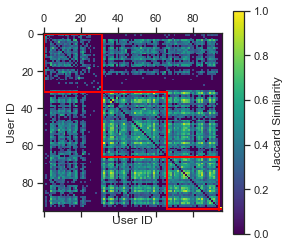

In [19]:
#This is a question of the coursework too.

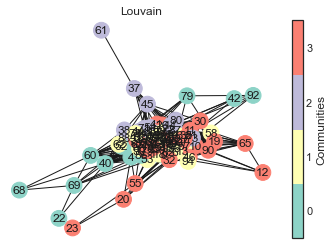

In [21]:
# Now plot the graph again using a a different method
draw_clu(G_per, nx.spring_layout(G_per), community.best_partition(G_per), 'Louvain')

# Dendrogram plot

In [15]:
#generic string visualization of Dendogram plot using louvain in community package
G = nx.karate_club_graph()

print(community.best_partition(G)) 

# Create and store the dendogram, then print it
dendrogram = community.generate_dendrogram(G)
print(community.partition_at_level(dendrogram, 0)) 
print(community.partition_at_level(dendrogram, 1)) 


{0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 2, 6: 2, 7: 0, 8: 1, 9: 0, 10: 2, 11: 0, 12: 0, 13: 0, 14: 1, 15: 1, 16: 2, 17: 0, 18: 1, 19: 0, 20: 1, 21: 0, 22: 1, 23: 3, 24: 3, 25: 3, 26: 1, 27: 3, 28: 3, 29: 1, 30: 1, 31: 3, 32: 1, 33: 1}
{0: 1, 1: 1, 2: 3, 3: 3, 4: 2, 5: 5, 6: 5, 7: 3, 8: 0, 9: 3, 10: 2, 11: 1, 12: 3, 13: 3, 14: 0, 15: 0, 16: 5, 17: 1, 18: 0, 19: 1, 20: 0, 21: 1, 22: 0, 23: 6, 24: 4, 25: 6, 26: 7, 27: 4, 28: 8, 29: 7, 30: 0, 31: 8, 32: 0, 33: 0}
{0: 0, 1: 0, 2: 0, 3: 0, 4: 3, 5: 3, 6: 3, 7: 0, 8: 2, 9: 0, 10: 3, 11: 0, 12: 0, 13: 0, 14: 2, 15: 2, 16: 3, 17: 0, 18: 2, 19: 0, 20: 2, 21: 0, 22: 2, 23: 1, 24: 1, 25: 1, 26: 2, 27: 1, 28: 1, 29: 2, 30: 2, 31: 1, 32: 2, 33: 2}


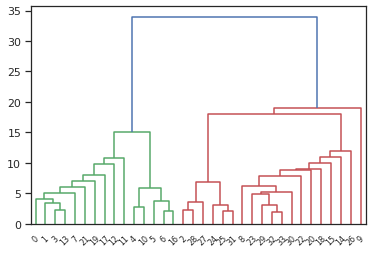

In [26]:
from itertools import chain, combinations #---> Library to improve iterables
from scipy.cluster.hierarchy import dendrogram #---> Library for computing dendrograms

# Get simulated Graph() and Girvan-Newman communities list, we can use either the similarity graph or the karate club graph

# By default we will use the karate club graph, uncomment the second line to use the similarity graph
G = nx.karate_club_graph()
#G=G_per

communities = list(nx.community.girvan_newman(G))

# building initial dict of node_id to each possible subset:
node_id = 0
init_node2community_dict = {node_id: communities[0][0].union(communities[0][1])}
for comm in communities:
    for subset in list(comm):
        if subset not in init_node2community_dict.values():
            node_id += 1
            init_node2community_dict[node_id] = subset

# turning this dictionary to the desired format in @mdml's answer
node_id_to_children = {e: [] for e in init_node2community_dict.keys()}
for node_id1, node_id2 in combinations(init_node2community_dict.keys(), 2):
    for node_id_parent, group in init_node2community_dict.items():
        if len(init_node2community_dict[node_id1].intersection(init_node2community_dict[node_id2])) == 0 and group == init_node2community_dict[node_id1].union(init_node2community_dict[node_id2]):
            node_id_to_children[node_id_parent].append(node_id1)
            node_id_to_children[node_id_parent].append(node_id2)

# also recording node_labels dict for the correct label for dendrogram leaves
node_labels = dict()
for node_id, group in init_node2community_dict.items():
    if len(group) == 1:
        node_labels[node_id] = list(group)[0]
    else:
        node_labels[node_id] = ''

# also needing a subset to rank dict to later know within all k-length merges which came first
subset_rank_dict = dict()
rank = 0
for e in communities[::-1]:
    for p in list(e):
        if tuple(p) not in subset_rank_dict:
            subset_rank_dict[tuple(sorted(p))] = rank
            rank += 1
subset_rank_dict[tuple(sorted(chain.from_iterable(communities[-1])))] = rank

# my function to get a merge height so that it is unique (probably not that efficient)
def get_merge_height(sub):
    sub_tuple = tuple(sorted([node_labels[i] for i in sub]))
    n = len(sub_tuple)
    other_same_len_merges = {k: v for k, v in subset_rank_dict.items() if len(k) == n}
    min_rank, max_rank = min(other_same_len_merges.values()), max(other_same_len_merges.values())
    range = (max_rank-min_rank) if max_rank > min_rank else 1
    return float(len(sub)) + 0.8 * (subset_rank_dict[sub_tuple] - min_rank) / range

# finally using @mdml's magic, slightly modified:
G           = nx.DiGraph(node_id_to_children)
nodes       = G.nodes()
leaves      = set( n for n in nodes if G.out_degree(n) == 0 )
inner_nodes = [ n for n in nodes if G.out_degree(n) > 0 ]

# Compute the size of each subtree
subtree = dict( (n, [n]) for n in leaves )
for u in inner_nodes:
    children = set()
    node_list = list(node_id_to_children[u])
    while len(node_list) > 0:
        v = node_list.pop(0)
        children.add( v )
        node_list += node_id_to_children[v]
    subtree[u] = sorted(children & leaves)

inner_nodes.sort(key=lambda n: len(subtree[n])) # <-- order inner nodes ascending by subtree size, root is last

# Construct the linkage matrix
leaves = sorted(leaves)
index  = dict( (tuple([n]), i) for i, n in enumerate(leaves) )
Z = []
k = len(leaves)
for i, n in enumerate(inner_nodes):
    children = node_id_to_children[n]
    x = children[0]
    for y in children[1:]:
        z = tuple(sorted(subtree[x] + subtree[y]))
        i, j = index[tuple(sorted(subtree[x]))], index[tuple(sorted(subtree[y]))]
        Z.append([i, j, get_merge_height(subtree[n]), len(z)]) # <-- float is required by the dendrogram function
        index[z] = k
        subtree[z] = list(z)
        x = z
        k += 1

# Create a figure to plot the dendrogram
plt.figure()

# "Catch" the call with a variable assignment so theoutput is shown properly
dend = dendrogram(Z, labels=[node_labels[node_id] for node_id in leaves])